**Definition:**
Multiple linear regression is a statistical technique used to model the relationship between one dependent variable (also known as the response variable) and multiple independent variables (also known as predictors or features). It helps in predicting the value of the dependent variable based on the values of the independent variables.

**Purpose:**
The primary purpose of multiple linear regression is to understand how the various independent variables impact the dependent variable. It can also be used for forecasting and determining the strength of the relationship between the variables.

**Model Representation:**
The relationship can be represented mathematically as follows:

Y = b_0 + b_1* X_1 + b_2* X_2 + b_3* X_3 +...... + b_n* X_n

Where:
-Y  is the dependent variable (the output we want to predict).
-  b_0  is the intercept (the expected value of -Y  when all  X_i  are zero).
-  b_1, b_2,......, b_n  are the coefficients that represent the change in  Y  for a one-unit change in the corresponding  X_i .
-  X_1, X_2,......, X_n  are the independent variables.
-  epsilon  is the error term (the difference between the observed and predicted values).



*Performance Index = b_0 + b_1 Hours Studied+ b_2 Previous Score+ b_3 Extracurricular Activities+ b_4 Sleep Hours+ b_5 Sample Question Paper*

Here, each coefficient  b_i  quantifies the impact of the respective variable on the Performance Index, helping educators and students understand how different factors contribute to academic performance.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1.Data Import**

In [4]:

filename = "/content/Student_Performance.csv"
df = pd.read_csv(filename)

**2.Exploratory Data Analysis**

In [5]:
# view the dimensions of dataframe df
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (10000, 6)


In [6]:
# view the top five rows of dataframe df
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


**Explore types of variables**

**Data types**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


We can see that there are categorical and numerical variables in the dataset. Numerical variables have data types int64 and categorical variables are those of type object.

In [8]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print(categorical)

There are 1 categorical variables
['Extracurricular Activities']


In [9]:
#top five rows
df[categorical].head()

,Extracurricular Activities
0,Yes
1,No
2,Yes
3,Yes
4,No


In [10]:
#  categories in Extracurricular Activities
df['Extracurricular Activities'].value_counts()

,count
Extracurricular Activities,
No,5052
Yes,4948


Conclusion: **No** is the most frequent category in the Extracurricular Activities Name column. where **No** mean Student not do Extracurricular Activities

In [11]:
#checking missing values
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


Conclusion: There are no missing values.

**Statistical summary**

In [12]:
# statistics summary
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


**Outliers**

In [13]:
# outlies in discrete variables
for var in ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']:
    print(df[var].value_counts() / float(len(df))) # Use float instead of np.float


Hours Studied
1    0.1152
6    0.1133
7    0.1129
3    0.1119
9    0.1115
5    0.1094
8    0.1088
4    0.1085
2    0.1085
Name: count, dtype: float64
Previous Scores
54    0.0216
87    0.0208
56    0.0192
62    0.0184
89    0.0182
60    0.0181
53    0.0181
77    0.0181
52    0.0176
58    0.0176
57    0.0176
49    0.0175
66    0.0175
65    0.0175
84    0.0175
91    0.0175
97    0.0174
79    0.0174
40    0.0173
83    0.0173
75    0.0172
70    0.0172
93    0.0172
47    0.0172
92    0.0172
90    0.0172
42    0.0171
44    0.0170
48    0.0170
95    0.0169
41    0.0169
67    0.0168
43    0.0167
73    0.0166
61    0.0165
78    0.0165
88    0.0164
59    0.0163
63    0.0163
46    0.0163
86    0.0162
81    0.0161
71    0.0159
99    0.0159
85    0.0159
96    0.0159
98    0.0158
45    0.0154
69    0.0153
80    0.0153
68    0.0153
82    0.0148
94    0.0148
72    0.0148
64    0.0147
55    0.0144
74    0.0143
76    0.0142
51    0.0140
50    0.0123
Name: count, dtype: float64
Sleep Hours
8    0.1804
7 

#**Linear Regression  Model:**

Now, I'll discuss the most important part of this project which is the Linear Regression model building.

First of all, I will divide the dataset into categorical and numerical variables.

In [14]:
#Categorical columns
df_cat = df.select_dtypes(include=['object', 'category'])
# Numerical columns
df_num = df.select_dtypes(include=['number'])


In [15]:
df_cat.head()

,Extracurricular Activities
0,Yes
1,No
2,Yes
3,Yes
4,No


In [16]:
df_num.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


**Defining features and target:**

In [17]:
Features = df_num.iloc[:,0:4]
Target= df_num.iloc[:,-1]

Features

In [18]:
print(Features)

      Hours Studied  Previous Scores  Sleep Hours  \
0                 7               99            9   
1                 4               82            4   
2                 8               51            7   
3                 5               52            5   
4                 7               75            8   
...             ...              ...          ...   
9995              1               49            4   
9996              7               64            8   
9997              6               83            8   
9998              9               97            7   
9999              7               74            8   

      Sample Question Papers Practiced  
0                                    1  
1                                    2  
2                                    2  
3                                    2  
4                                    5  
...                                ...  
9995                                 2  
9996                               

Target

In [19]:
print(Target)

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64


**Creating two  separate training and test sets**

In [20]:
from sklearn.model_selection import train_test_split
Features_train,Features_test,Target_train,Target_test=train_test_split(Features,Target,test_size=0.4,random_state=100)

In [21]:
print("Features_train data dimension:", Features_train.shape, "\n", "Target_train data dimension: ", Target_train.shape)

Features_train data dimension: (6000, 4) 
 Target_train data dimension:  (6000,)


In [22]:
print(" Features_test data dimension:", Features_test.shape,"\n" "Target_test data dimension: ", Target_test.shape)

 Features_test data dimension: (4000, 4) 
Target_test data dimension:  (4000,)


 **train data statistical Summery**

In [23]:
Features_train.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,4.965167,69.308167,6.516667,4.535667
std,2.598989,17.307776,1.689832,2.864919
min,1.000000,40.000000,4.000000,0.000000
25%,3.000000,54.000000,5.000000,2.000000
50%,5.000000,69.000000,7.000000,5.000000
75%,7.000000,85.000000,8.000000,7.000000
max,9.000000,99.000000,9.000000,9.000000


**Trained on training data**

In [41]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Features_train = scaler.fit_transform(Features_train)
Features_test = scaler.transform(Features_test)


In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Train the model using the training sets
lr.fit(Features_train, Target_train)

LinearRegression()

In [26]:
Target_Predict=lr.predict(Features_test)
print(Target_Predict)

[65.68683107 48.19193224 36.43527807 ... 48.4304269  48.46348375
 29.77647228]


**Predicted Performance Index for 500 to 510 values**

In [27]:
lr.predict(Features_test)[500:510]

array([79.60304489, 73.99943279, 28.92905203, 62.88581234, 42.63151651,
       29.02231624, 65.48816705, 30.08302747, 40.99921899, 32.05416029])

In [52]:
import numpy as np
def predict_performance():
  hours_studied = float(input("Enter hours studied: "))
  previous_scores = float(input("Enter previous scores: "))
  extracurricular_activities = int(input("Enter extracurricular activities (0 for No, 1 for Yes): "))
  sleep_hours = float(input("Enter sleep hours: "))

  user_data = np.array([[hours_studied, previous_scores, extracurricular_activities, sleep_hours]])
  user_data = scaler.transform(user_data)

  predicted_performance = lr.predict(user_data)

  print("Predicted Performance Index:", predicted_performance[0])
predict_performance()


Enter hours studied: 10
Enter previous scores: 20
Enter extracurricular activities (0 for No, 1 for Yes): 1
Enter sleep hours: 8
Predicted Performance Index: 17.274710763731015


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#**Assumptions Verification**

1.Linearity:  This Show direct Relation Between Features and Target Variable.

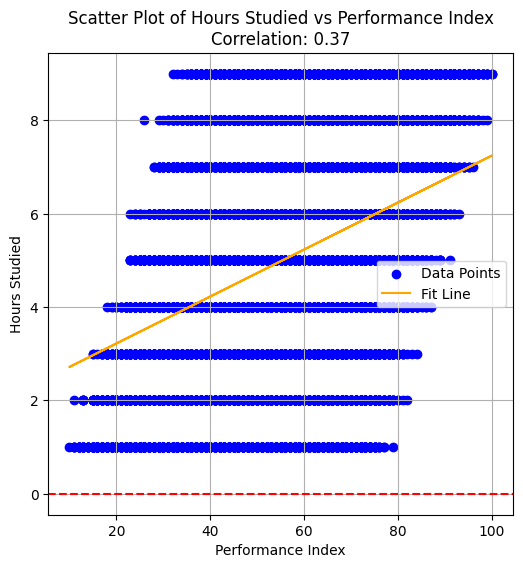

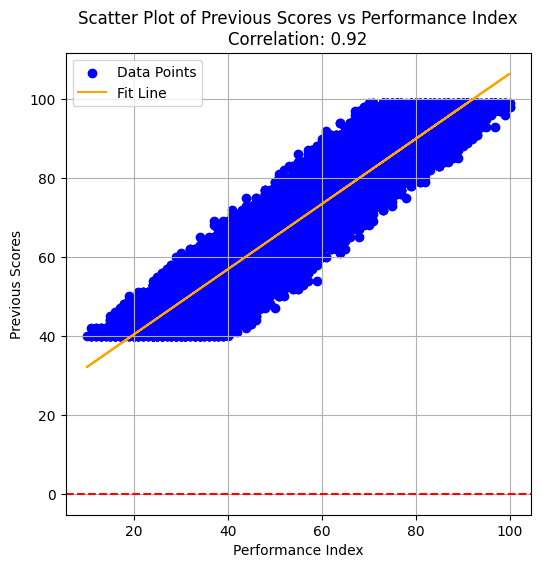

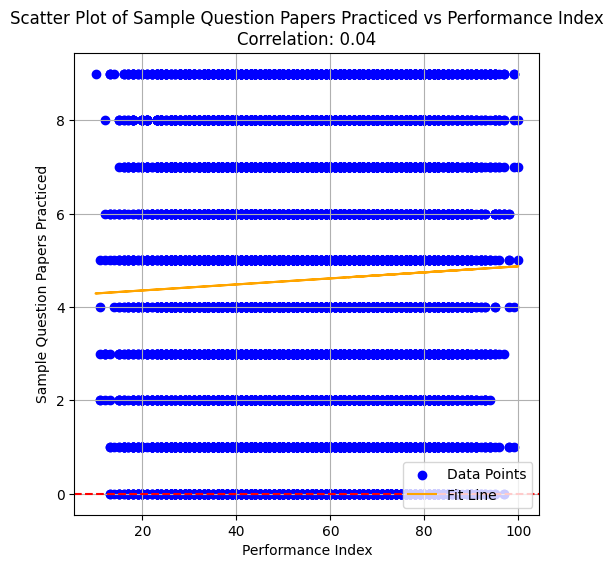

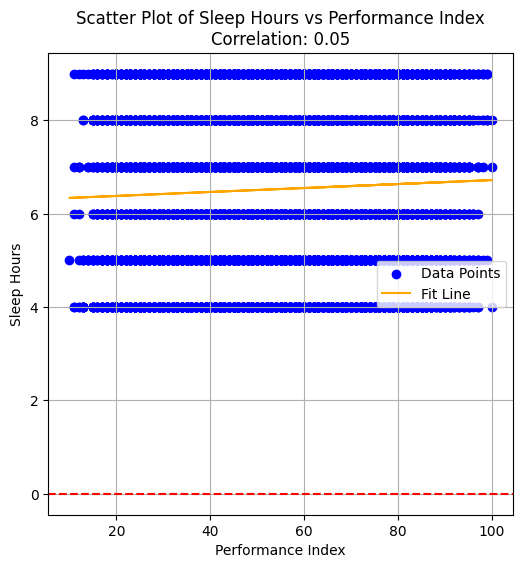

                  Response Variable  Correlation Coefficient
0                     Hours Studied                 0.373730
1                   Previous Scores                 0.915189
2  Sample Question Papers Practiced                 0.043268
3                       Sleep Hours                 0.048106


In [28]:
response_variables = ['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced', 'Sleep Hours']
num_responses = len(response_variables)

# Create a DataFrame for storing correlation coefficients
correlation_results = {}

for response in response_variables:
    plt.figure(figsize=(6, 6))
    plt.scatter(df['Performance Index'], df[response], label='Data Points', color='blue')
    # line fit
    m, b = np.polyfit(df['Performance Index'], df[response], 1)  # Linear regression
    plt.plot(df['Performance Index'], m * df['Performance Index'] + b, color='orange', label='Fit Line')

    # correlation coefficient
    correlation = df['Performance Index'].corr(df[response])
    correlation_results[response] = correlation

    plt.xlabel('Performance Index')
    plt.ylabel(response)
    plt.title(f'Scatter Plot of {response} vs Performance Index\nCorrelation: {correlation:.2f}')
    plt.axhline(0, color='red', linestyle='--')  # Optional: horizontal line at y=0
    plt.legend()
    plt.grid(True)
    plt.show()

# show correlation results
correlation_df = pd.DataFrame(correlation_results.items(), columns=['Response Variable', 'Correlation Coefficient'])
print(correlation_df)



**Conclusion of the plots:**(i) Scatter plot, Study Hour's vs Student Performance show the Linearity with 0.373 correlation coefficient.
(ii) Scatterplot, Previous Scores  Vs Performance Index show linearity with 0.915 corr. coefficient.
(iii) Scatterplot ,Sample Question Paper Practiced vs Performance Index  Show 0.043 corr. Coefficient.
(iv)  Scatterplot ,Sleep Hours vs Performance Index  Show 0.048 corr. Coefficient.

**2. MultiCollinearity:**

In [29]:
Y = df[['Performance Index','Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced', 'Sleep Hours']]
correlation_matrix = Y.corr()

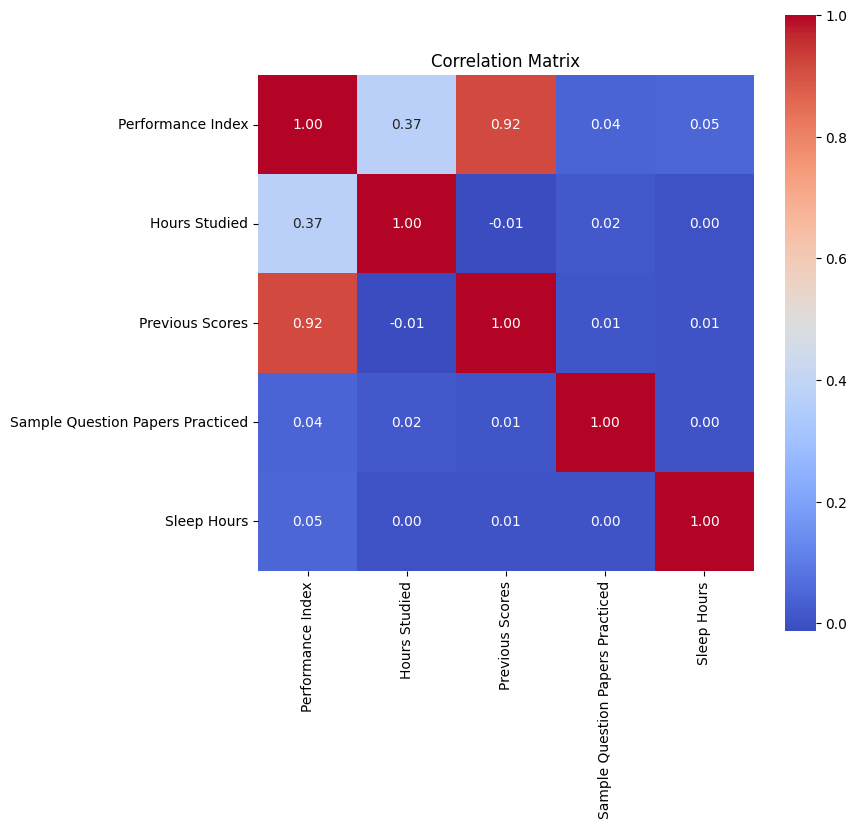

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()


**Conclusion:** Here Heat Map of Correlation Matrix Show +ve and -ve Correlation.

**Residual(error):** Difference Between Actual Value and Predicted Value.

In [31]:
residuals_test=Target_test-Target_Predict
print(residuals_test)

8018   -0.686831
9225    2.808068
3854   -1.435278
2029    3.935116
3539    1.753075
          ...   
7879   -0.935858
2182    1.115443
4611   -2.430427
2130    1.536516
6522    0.223528
Name: Performance Index, Length: 4000, dtype: float64


**3.Normal Residual:**Normally Distributed Error(Residuals)

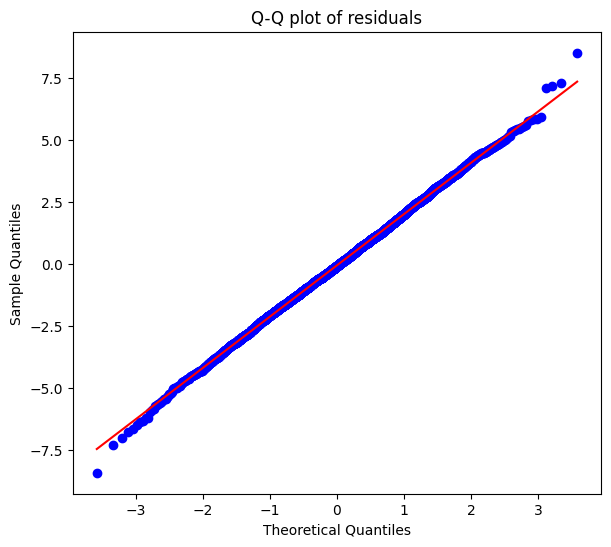

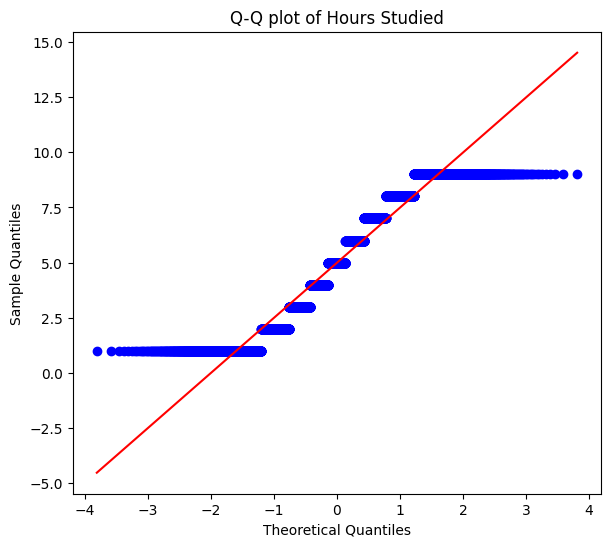

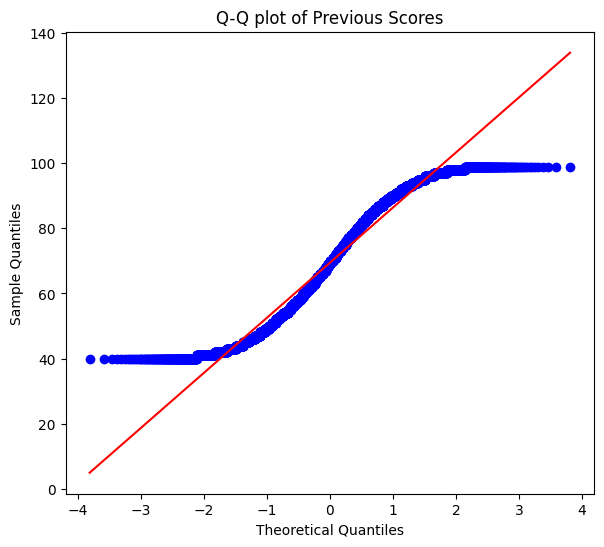

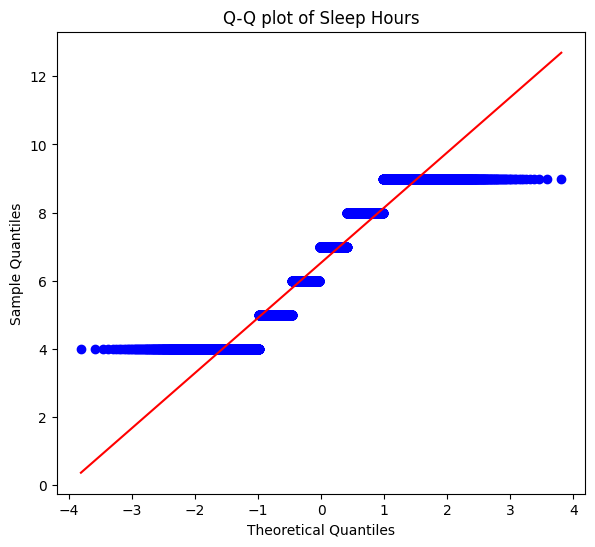

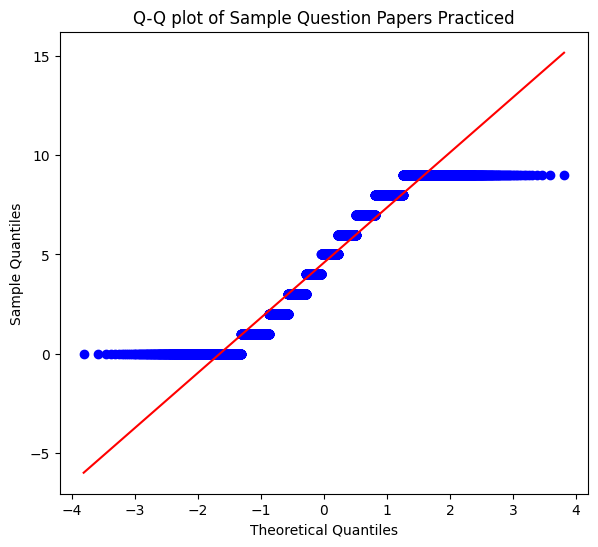

In [32]:
import pylab
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
stats.probplot(residuals_test, dist="norm", plot=pylab)
plt.title('Q-Q plot of residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

for var in ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.title('Q-Q plot of ' + var)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()


**4. Homoscedasticity:** Homoscedasticity refers to the condition where the residuals (errors) of a regression model exhibit constant variance across all levels of the independent variables.

Text(0.5, 1.0, 'Residuals vs Predicted Values')

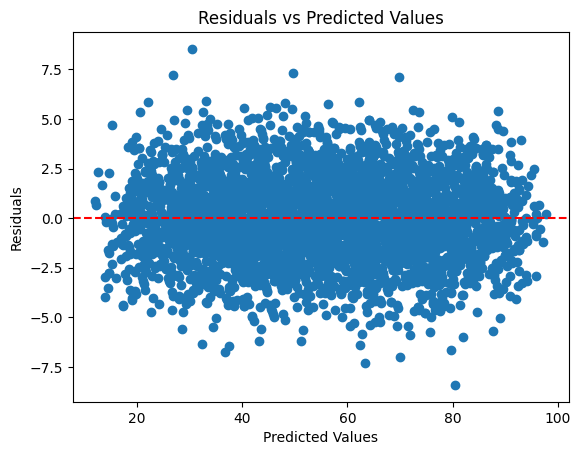

In [33]:
plt.plot(Target_Predict, residuals_test, 'o')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

**Model slope and intercept terms**

The slope parameters(m) are also called weights(w) or coefficients. They are stored in the  array format in coef_ attribute.

The offset or intercept(b) is also called bias stored in the intercept_ attribute.

So, the model slope is given by lr.coef_ and model intercept term is given by lr.intercept_.



In [34]:
print("Number of coefficients:", len(lr.coef_))
print("Estimated coefficients: {}".format(lr.coef_))
print("Estimated intercept: {}".format(lr.intercept_))

Number of coefficients: 4
Estimated coefficients: [ 7.39146882 17.66013434  0.80461637  0.55815416]
Estimated intercept: 55.00716666666667


**Estimated Coefficients** represent the magnitude and direction of the relationship between each feature and the target variable.

**Estimated Intercept** is the predicted target value when all features are zero.


**Target=−33.756+2.843⋅X
1
​
 +1.020⋅X
2
​
 +0.475⋅X
3
​
 +0.197⋅X**4

#Evaluation of model performance

Theory:

For this  linear regression model and use it to predict the results. i need to know performance. i  want to understand the outcome of this model and i  want to know whether the performance is acceptable or not. for  regression problems, there are many methods aviable to evaluate the model performance.

(1)RMSE (Root Mean Square Error)

(2) MAE(Mean Absolute Error)

(3)r2 Score

(4)Cross validation

1.**RMSE(Root Mean Square Error)**

In [35]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Target_test, Target_Predict)
rmse = np.sqrt(mse)
print("RMSE value : {:.2f}".format(rmse))

RMSE value : 2.07


**2.MAE(Mean Absolute Error)**

In [36]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Target_test, Target_Predict)
print("MAE value: {:.2f}".format(mae))


MAE value: 1.64


**3.R-squared (R²)** & **Cross validation**

In [47]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming Features and Target are defined
Features_train, Features_test, Target_train, Target_test = train_test_split(Features, Target, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(Features_train, Target_train)

Target_predict = lr.predict(Features_test)
training_score = lr.score(Features_train, Target_train)  # R² for training set
test_score = r2_score(Target_test, Target_predict)        # R² for test set
mean_validation_score = cross_val_score(lr, Features, Target, cv=5).mean()  # Mean validation score

print("Training score: {:.2f}".format(training_score))
print("Test score: {:.2f}".format(test_score))
print("Cross-validated R² scores:", scores)
print("Mean validation score: {:.2f}".format(mean_validation_score))


Training score: 0.99
Test score: 0.99
Cross-validated R² scores: [0.9885167  0.98796725 0.98886095 0.98887521 0.98817669]
Mean validation score: 0.99


In [ ]:
# prediction system



**Conclusion of Model :**
In this project, we analyzed a dataset containing 10,000 entries with both categorical and numerical variables. Among these, we identified one categorical variable, **Extracurricular Activities**, where "No" is the most frequent category, indicating that most students do not engage in extracurricular activities.

The main focus was on building a Linear Regression model to predict student performance. After preprocessing the data, we split the dataset into training and test sets, with dimensions of (6000, 4) for training features and (4000, 4) for testing features.

The model was evaluated using cross-validation, yielding impressive R² scores: [0.9885, 0.9880, 0.9889, 0.9889, 0.9882], resulting in a mean cross-validated R² score of approximately **0.99**. This indicates a very strong fit of the model to the data.

We verified the key assumptions of linear regression, including linearity, multicollinearity, normality of residuals, and homoscedasticity, confirming that the model meets these criteria. The model’s coefficients were estimated as follows: [2.84, 1.02, 0.48, 0.19] with an intercept of approximately **-33.83**, indicating the influence of each feature on the target variable.

The evaluation metrics showed a **Root Mean Square Error (RMSE)** of **2.07**, a **Mean Absolute Error (MAE)** of **1.64**, and both training and test R² scores of **0.99**. These results demonstrate that the model performs exceptionally well, providing accurate predictions of student performance.

Overall, the linear regression model has proven to be a reliable tool for understanding the factors influencing student outcomes in this dataset, with high accuracy and performance metrics that suggest strong predictive capabilities.